# Double Descent in Linear Regression

This notebook is based on a recent 
[paper](https://arxiv.org/abs/1912.02292) 
that observed a phenomenon dubbed "(model-based) double descent". 
To understand this idea, consider the bias-variance tradeoff 
from classical statistics. 
Roughly this says that as you increase the 
number of parameters in a model, 
the bias decreases at the cost of increasing the variance. 
This tells you to expect that as you increase 
model complexity by more parameters you should 
expect worse generalization since the model memorizes the data. 
On the contrary, it has been pointed out in this paper 
and references therein that test performance actually 
becomes better again after becoming worse. 
This notebook explores this effect.

Indeed, we begin by importing the `descender`
module. This module allows us to quickly
generate some data by a user-defined signal
map from the input to the output.
The `make_data` and `split_data` methods 
generate data under the signal model, add noise,
and splits the data to train and test sets.

In [1]:
from descender import *
import matplotlib.pyplot as plt

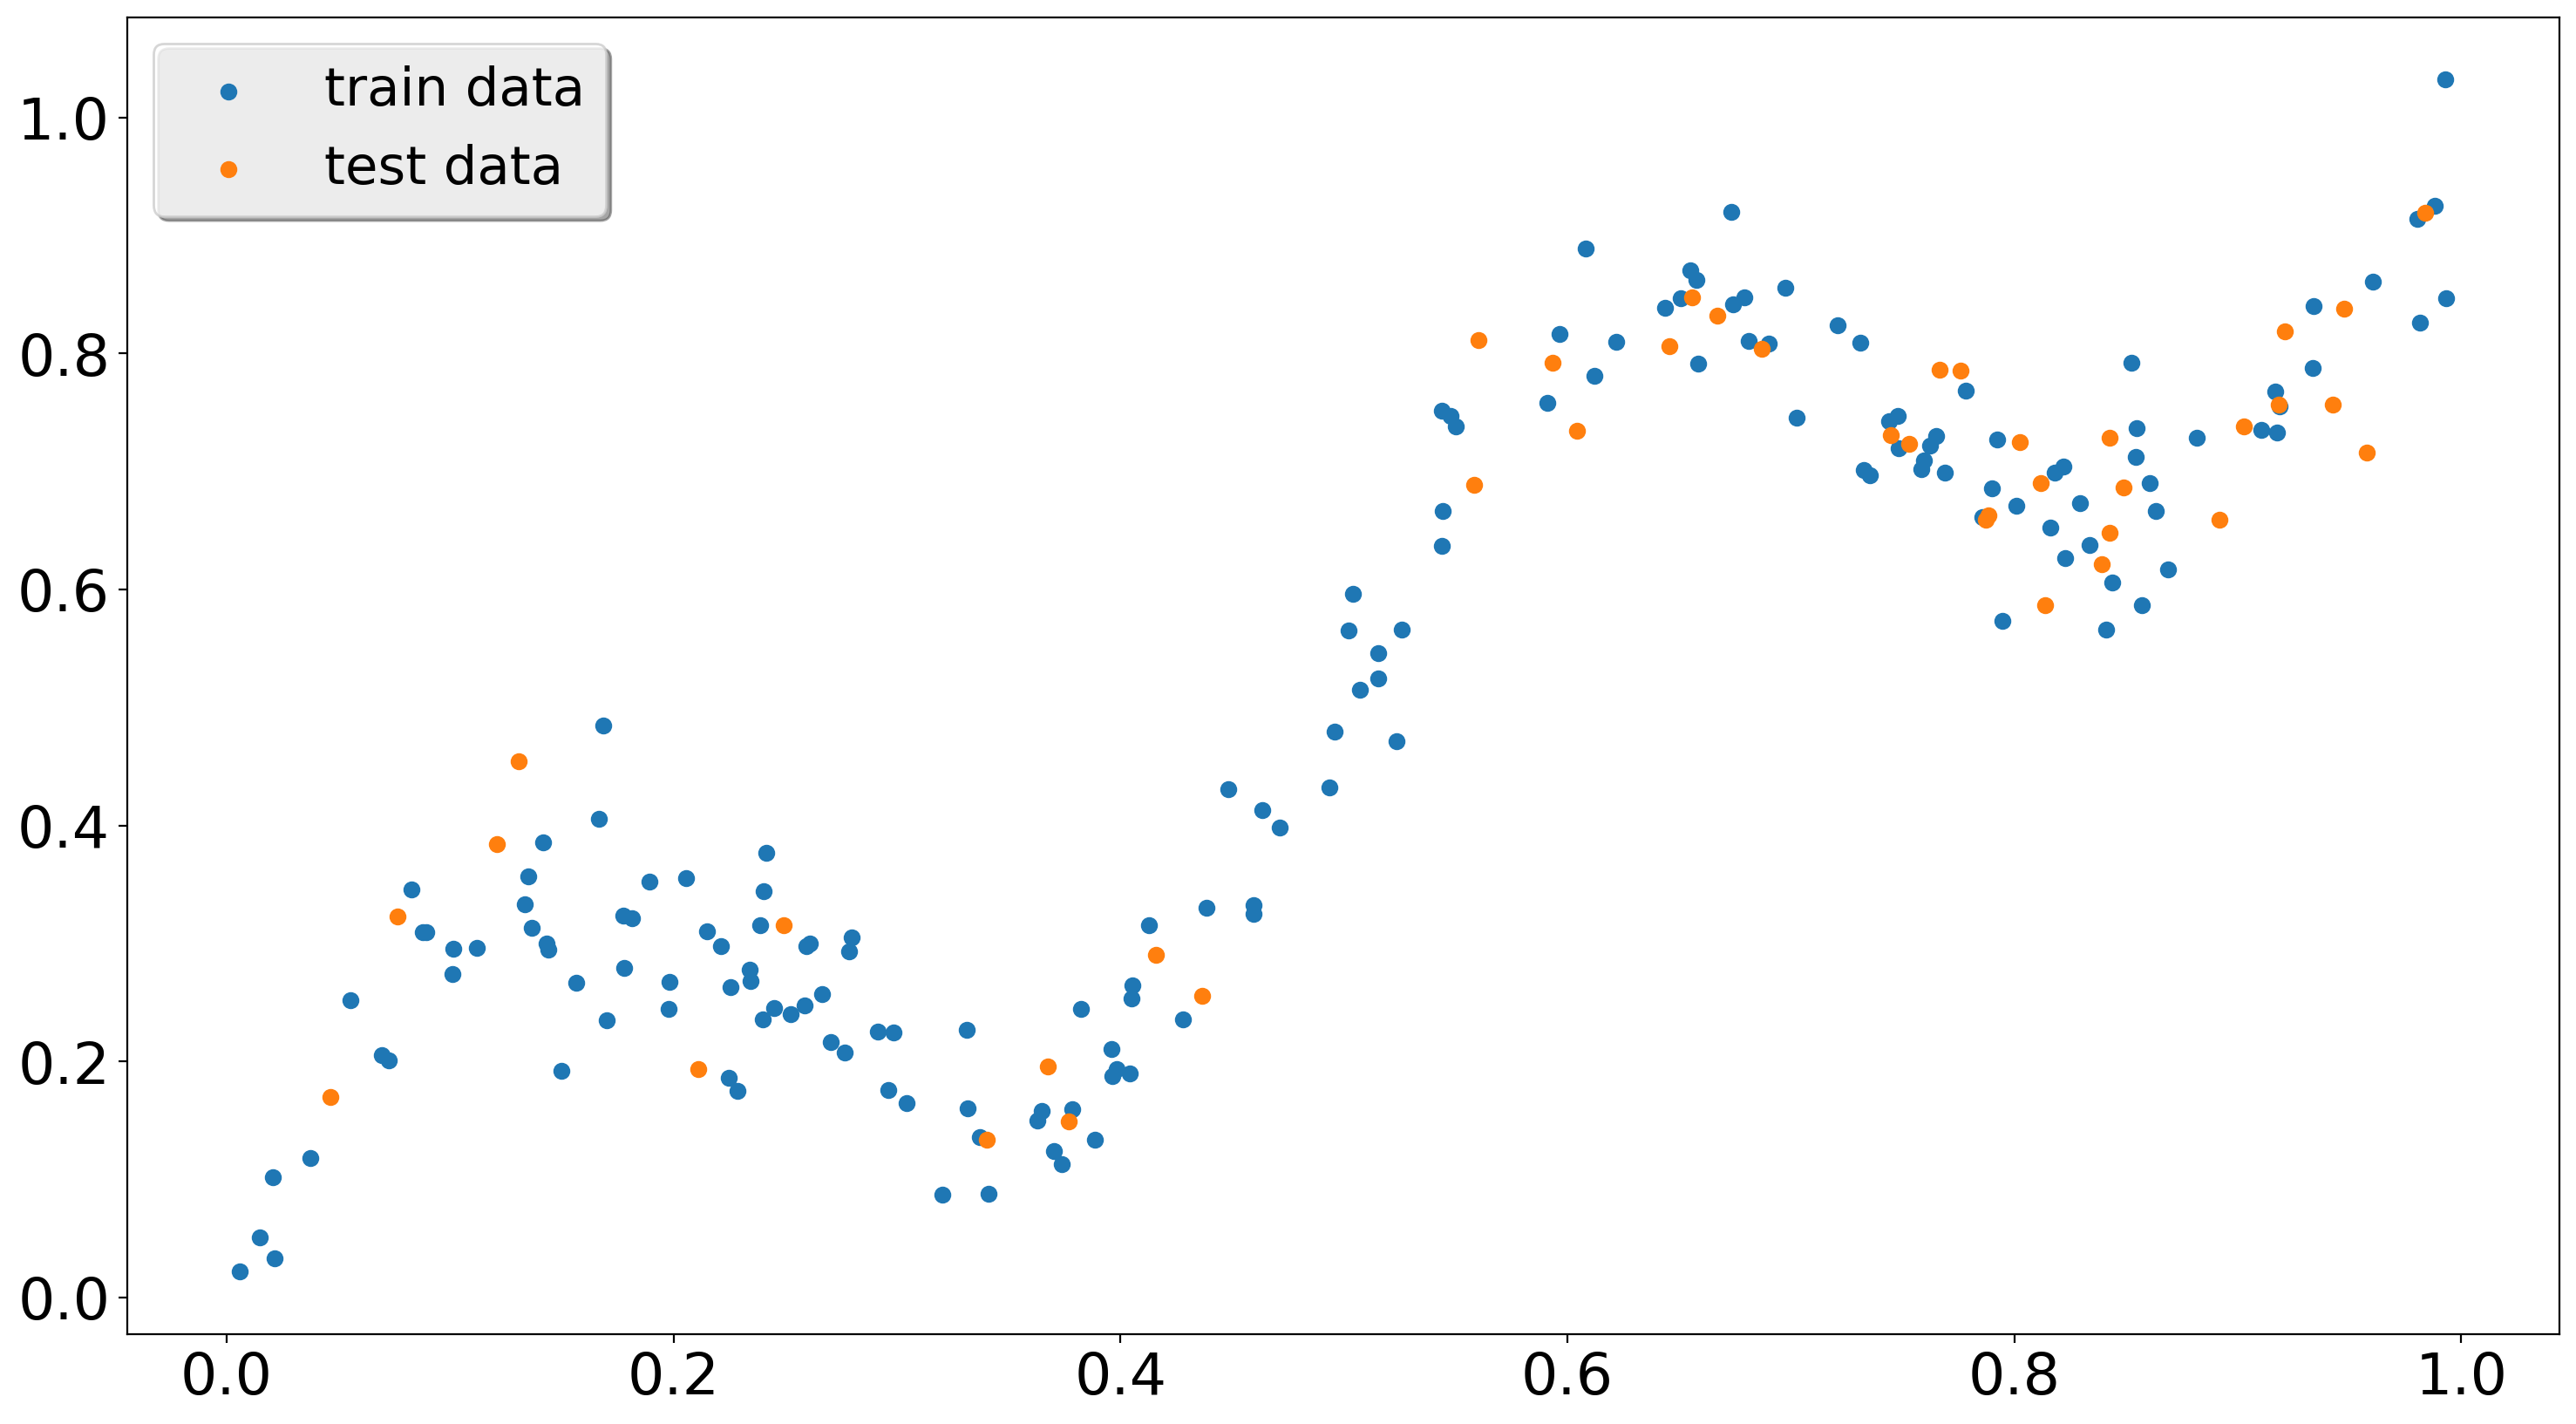

In [2]:
x = np.random.uniform(0, 1, 200)
x = np.sort(x)
def sinusoid(x):
    period = 0.5
    return np.sin(2 * np.pi * x / period) / 5 + x
sigma = 0.05

dd = Descender(x, sinusoid, sigma)

fig, ax = plt.subplots()
dd.plot_data(ax)

Now let's plot the learned function.

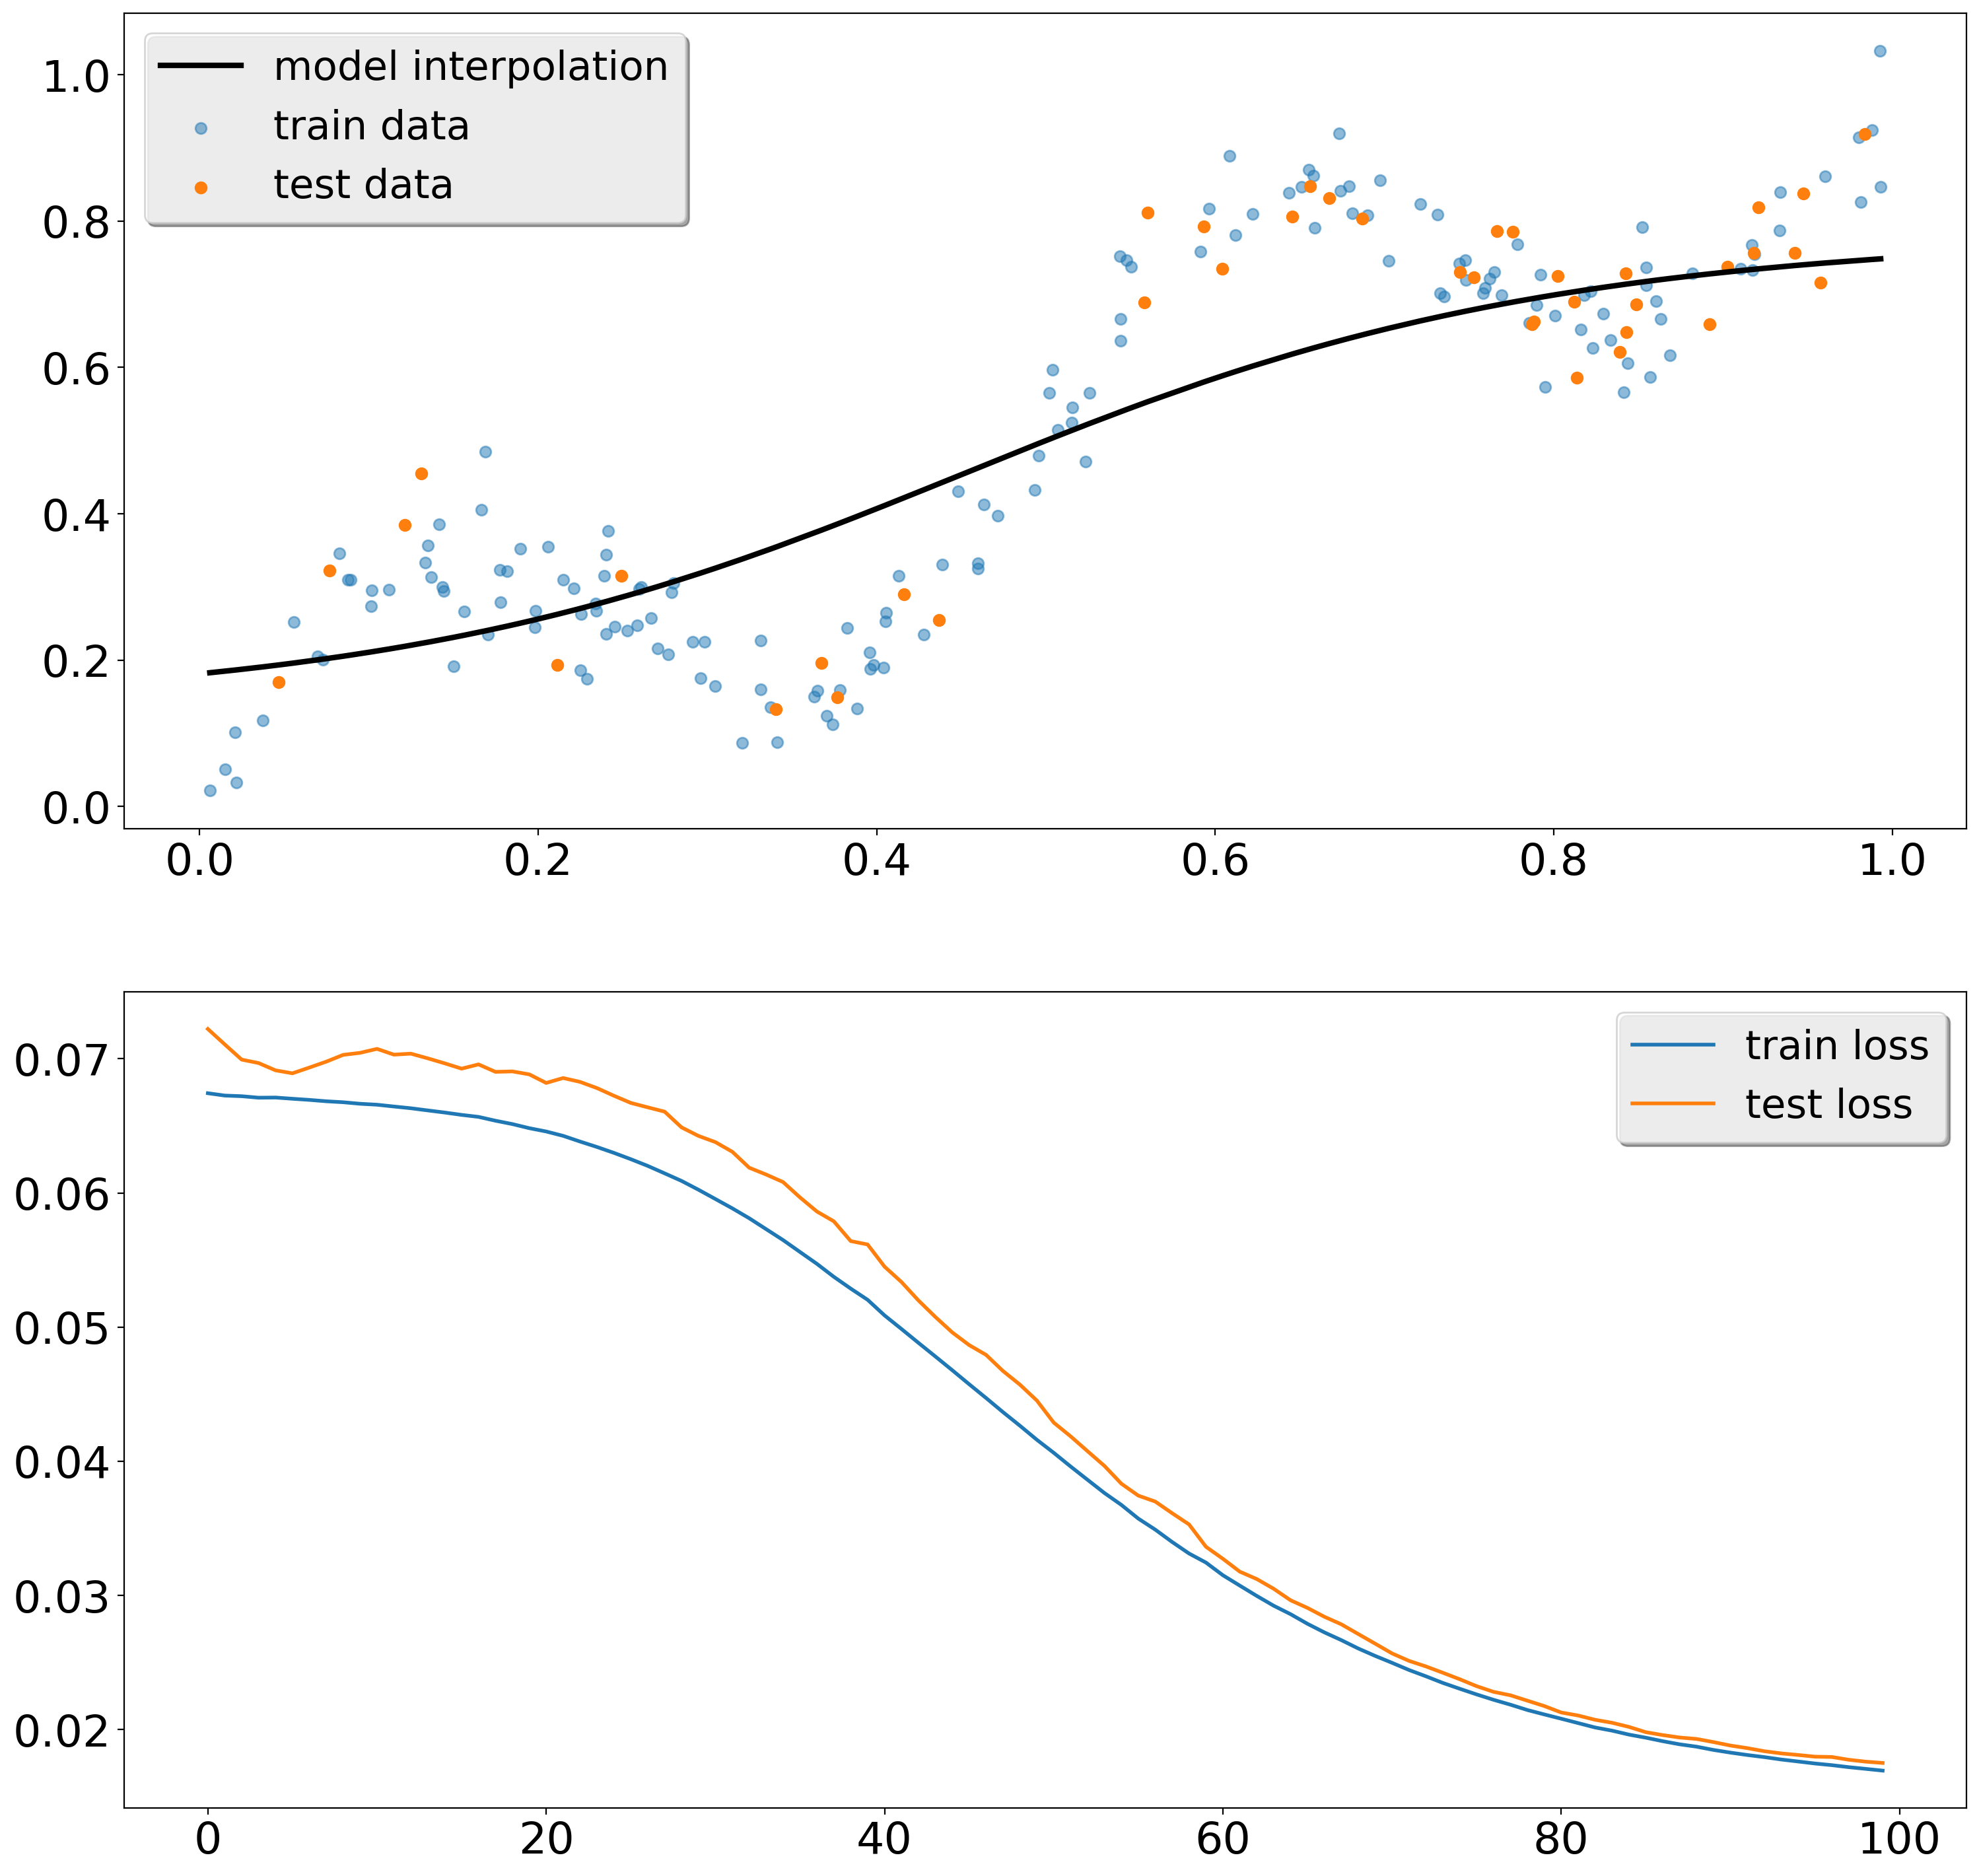

In [3]:
dd.plot_model_and_loss(1, 100)

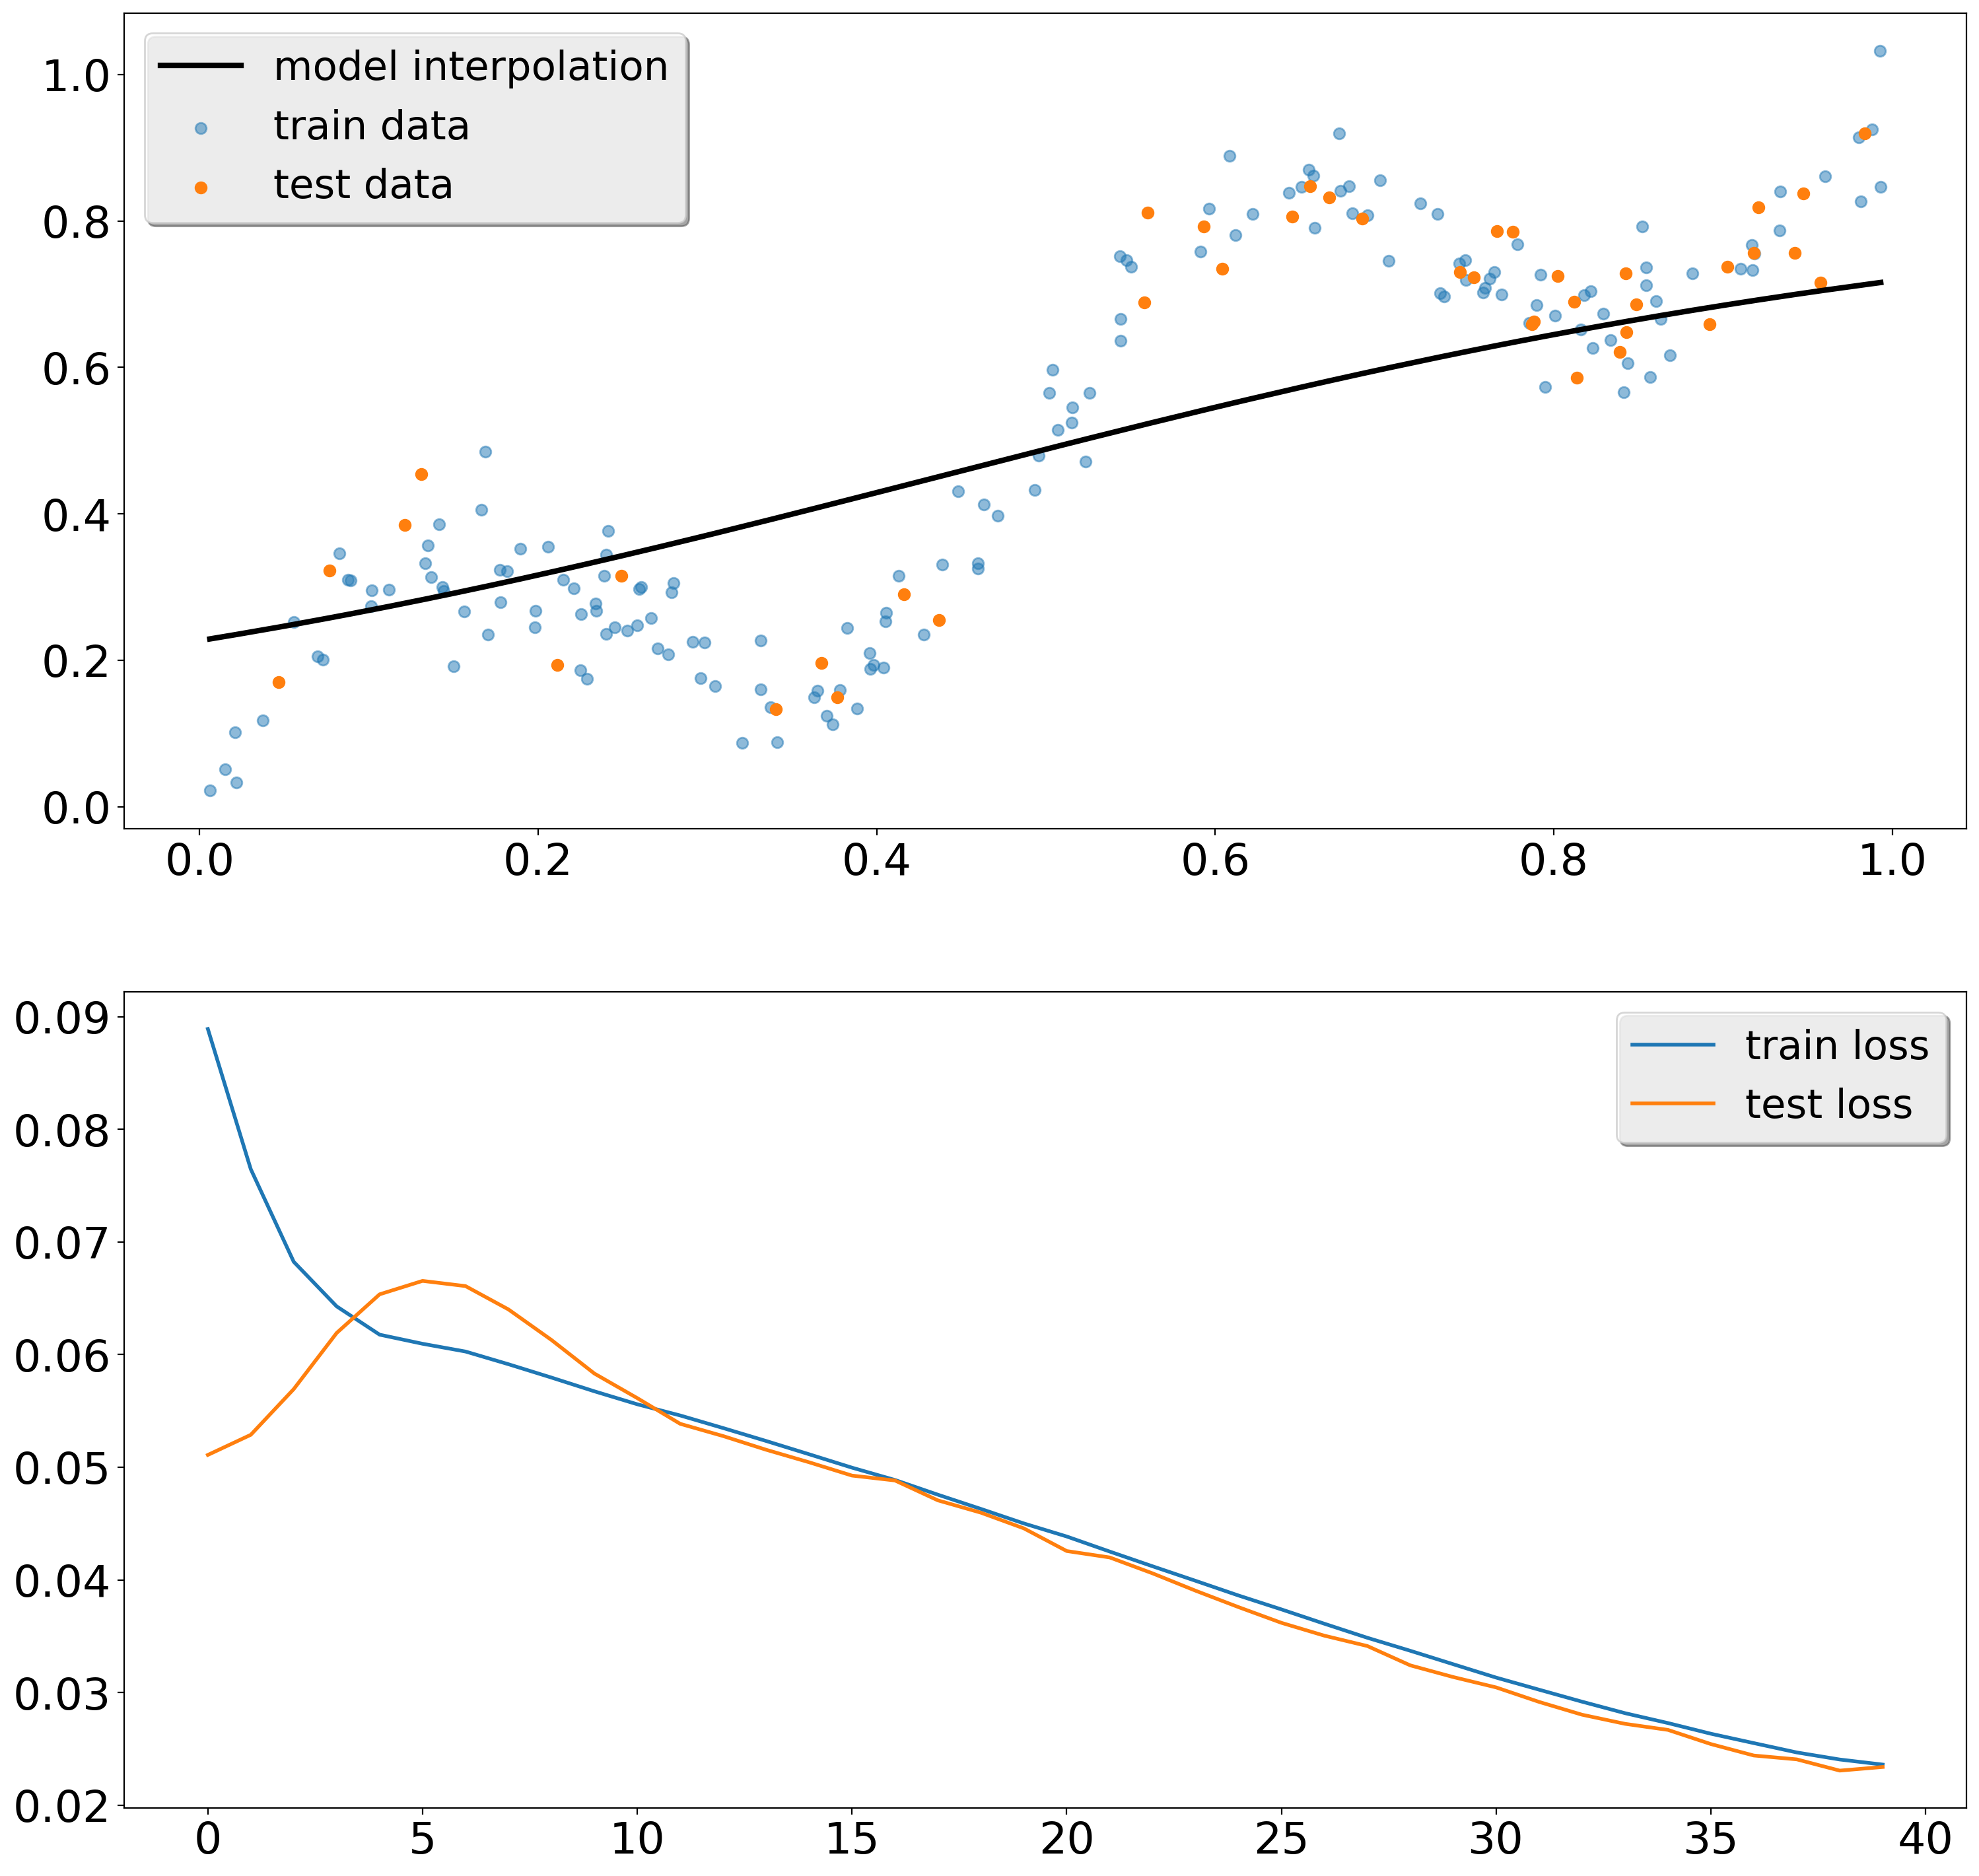

In [4]:
dd.plot_model_and_loss(5, 40)

In [5]:
units = [1, 10, 50]
epochs = [5, 50, 500, 5000]
grid_data = dd.grid_models(units, epochs)

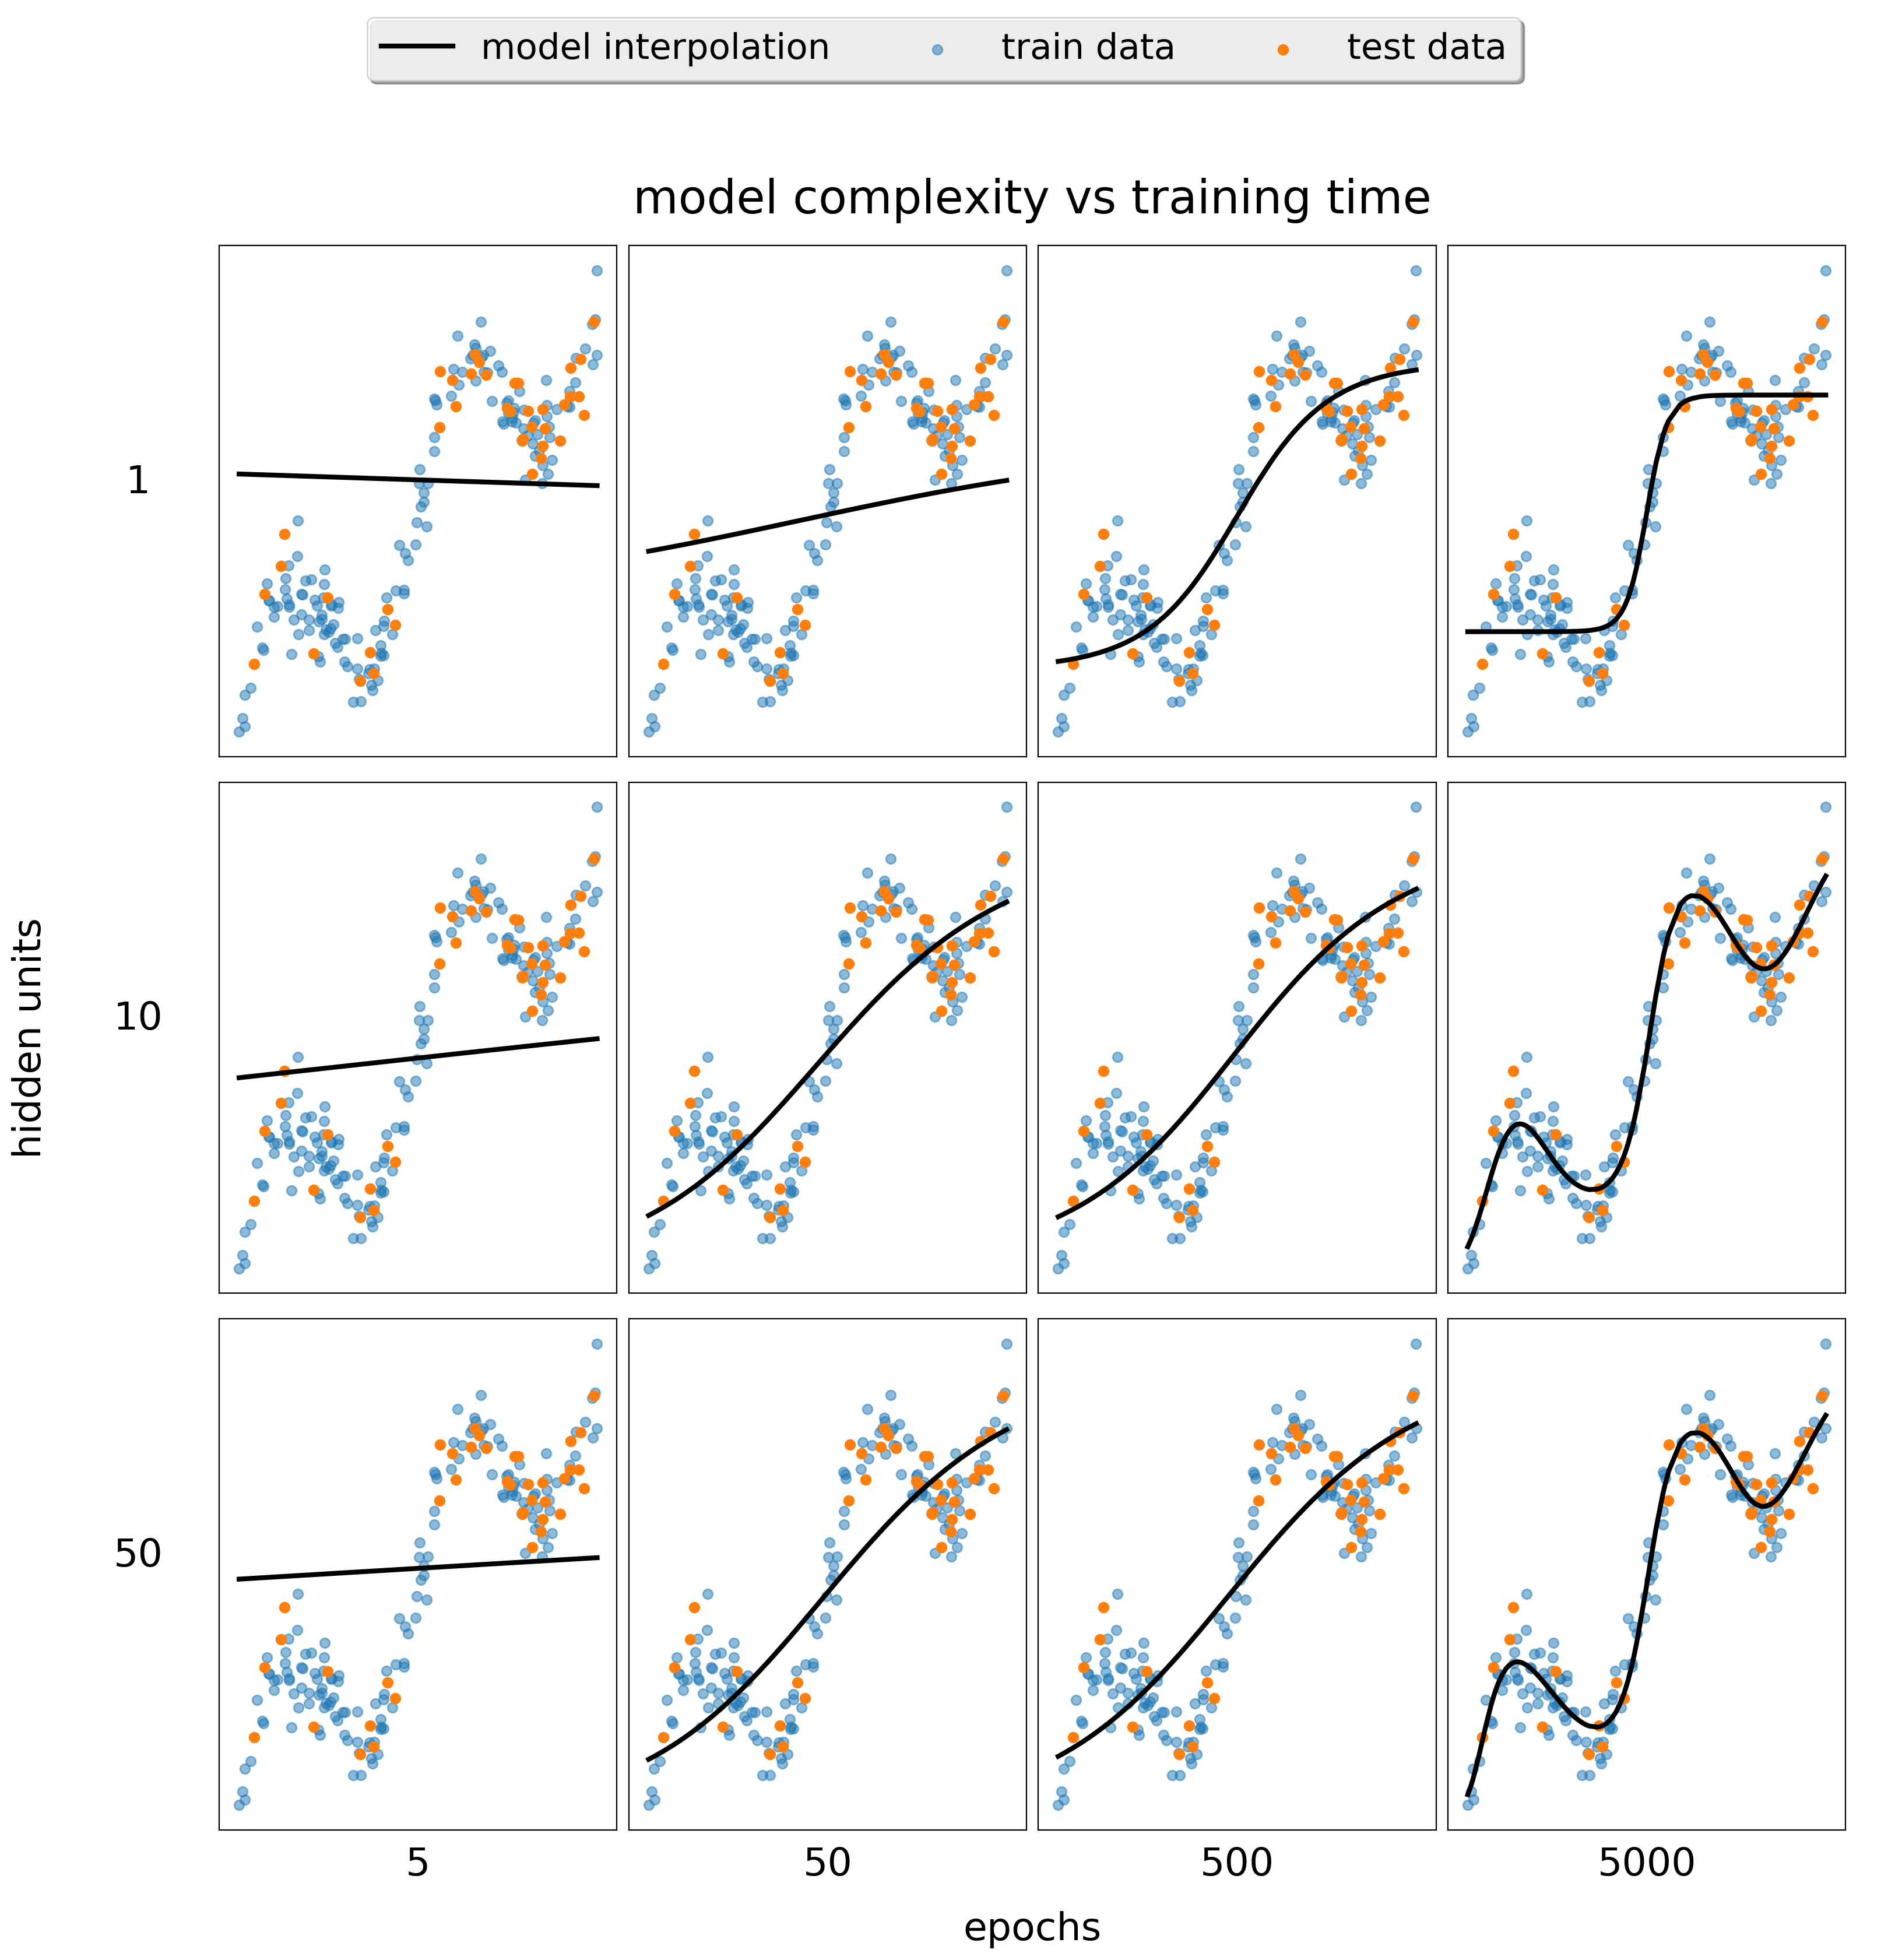

In [6]:
dd.plot_grid(units, epochs, grid_data)

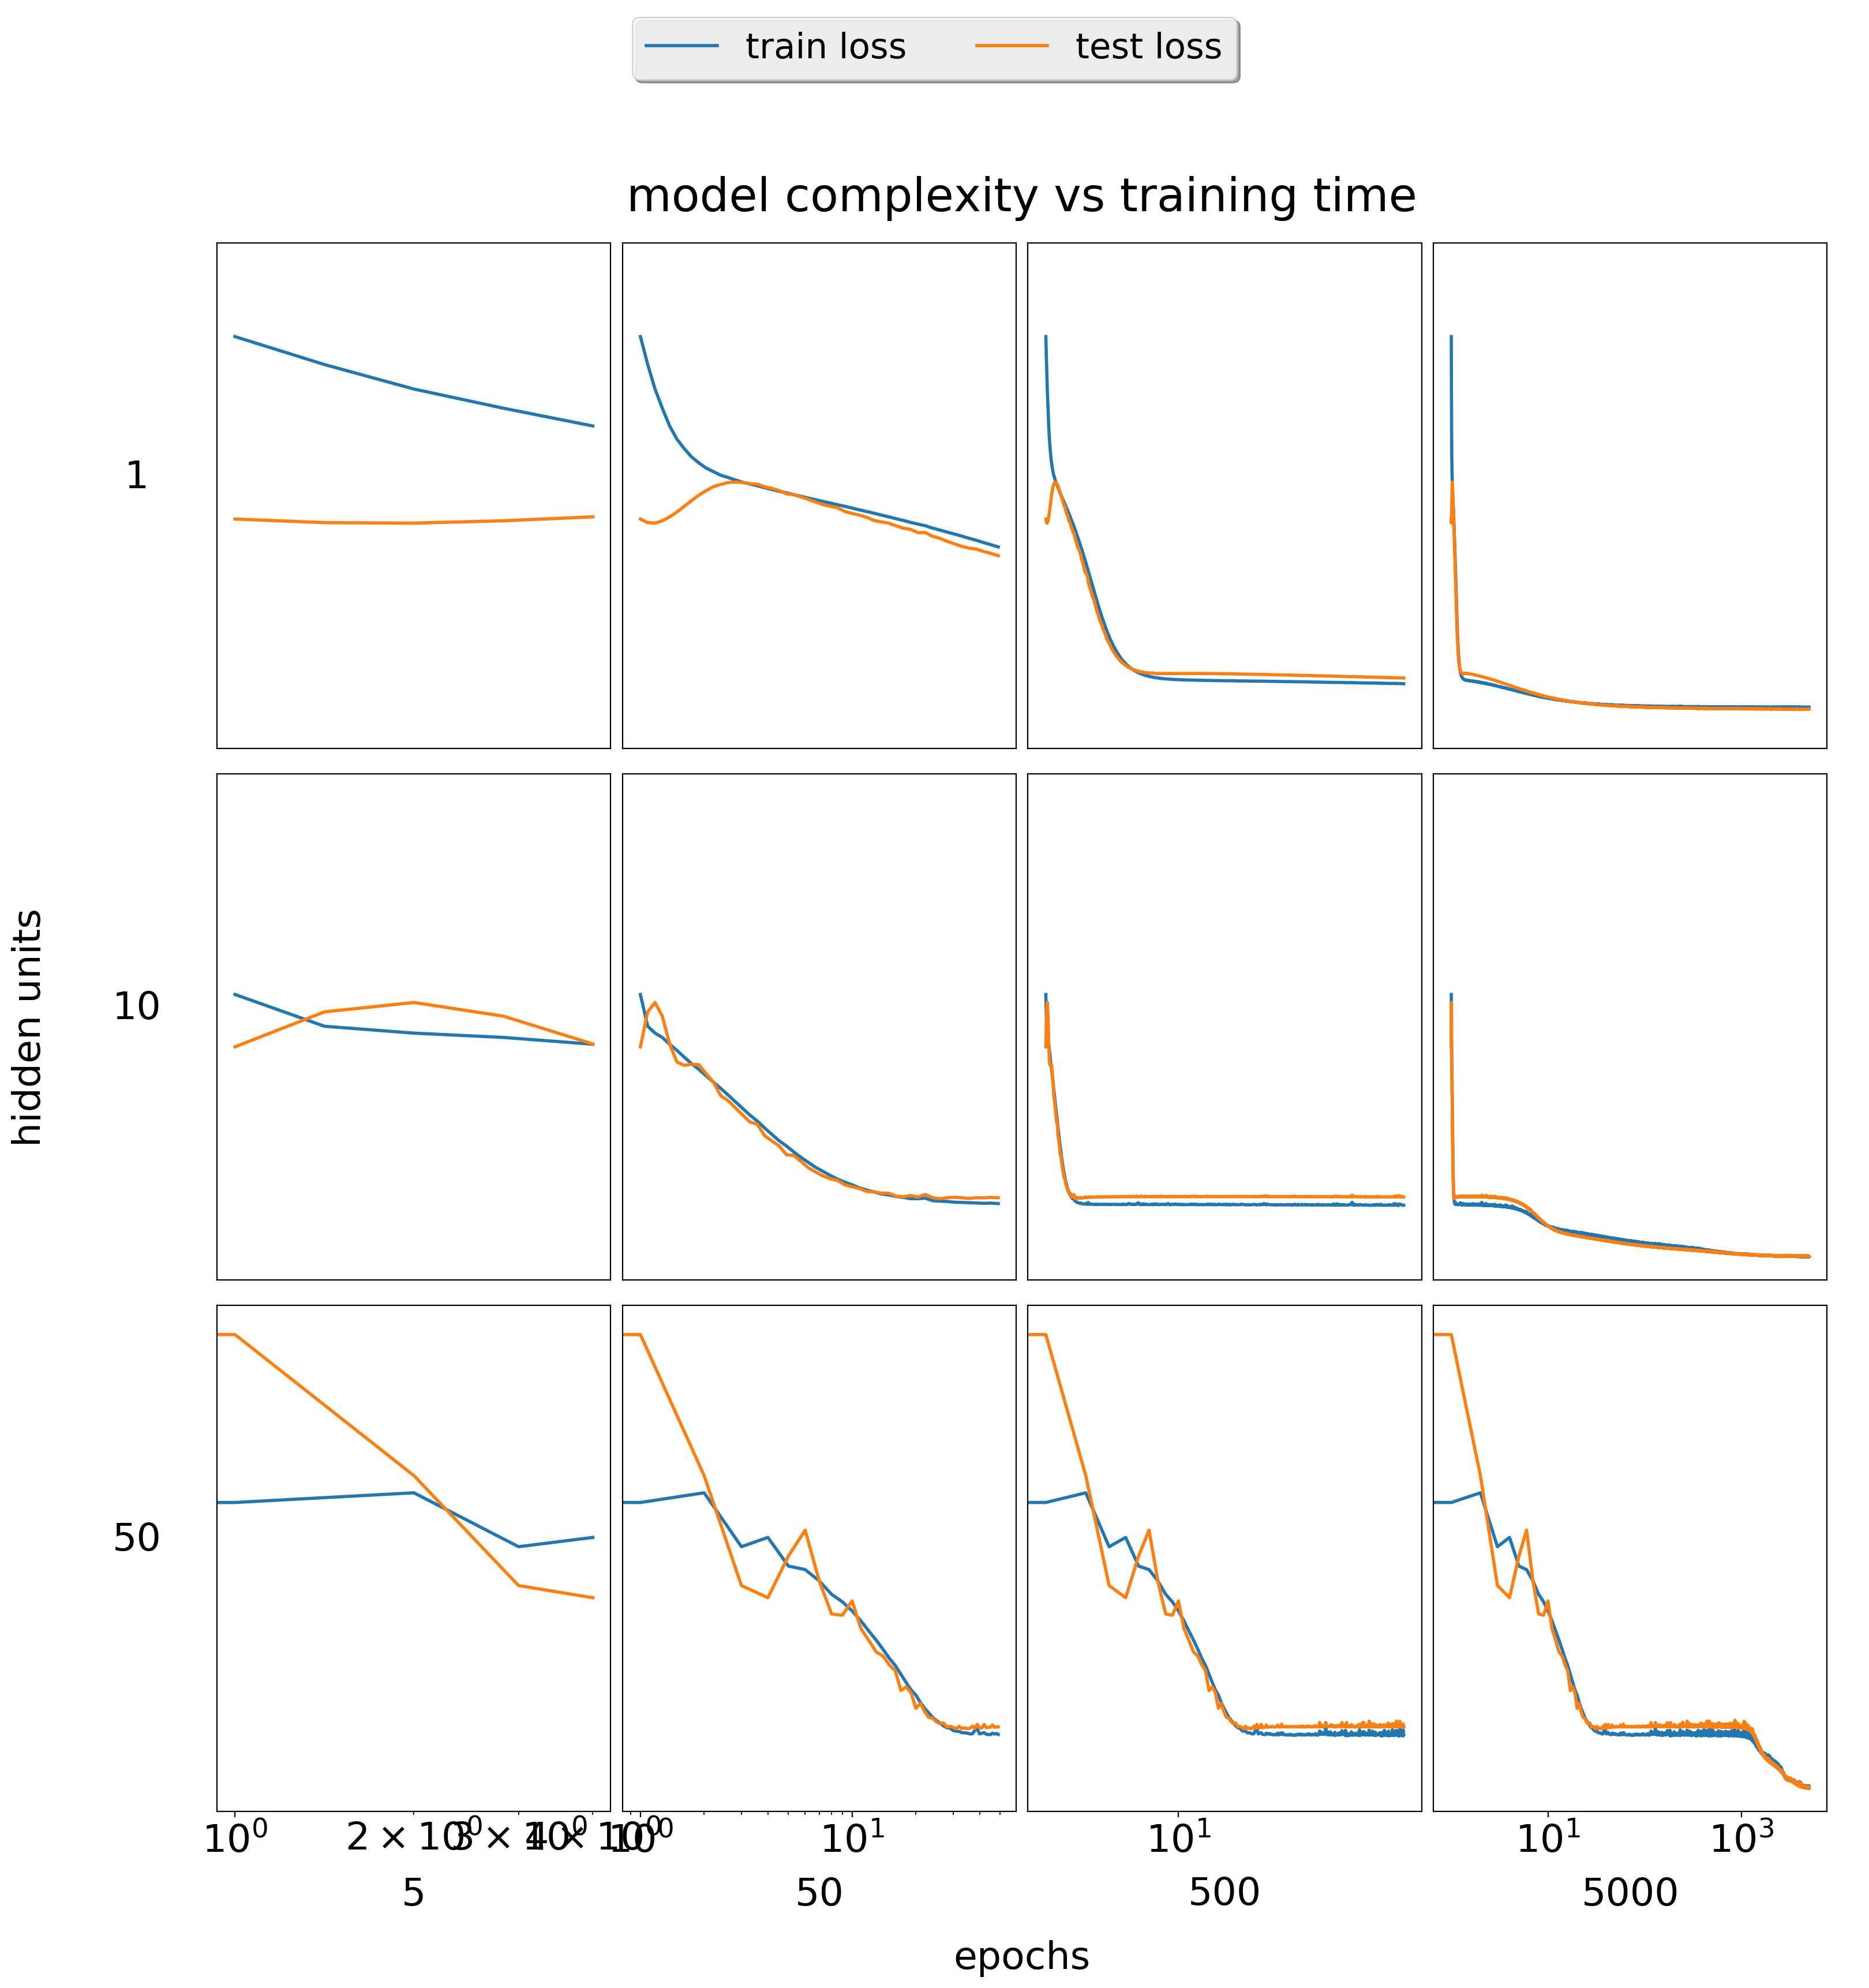

In [7]:
dd.plot_grid(units, epochs, grid_data, loss=True)